In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

In [16]:
normal_path = "/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Normal"
stroke_path = "/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke"

In [18]:
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

In [20]:
print("Images in Normal Data:",len(normal_folder))
print("Images in Stroke Data:",len(stroke_folder))

Images in Normal Data: 1551
Images in Stroke Data: 950


In [22]:
data=[]
for img_file in normal_folder:
    image=Image.open("/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Normal/"+img_file)
    image=image.resize((224,224))
    image=image.convert(('RGB'))
    image=np.array(image)
    data.append(image)
for img_file in stroke_folder:
    image=Image.open("/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/" +img_file)
    image=image.resize((224,224))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)
    

In [23]:
len(data)

2501

In [24]:
data[0].shape

(224, 224, 3)

In [25]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [28]:
normal_label=[0]*len(normal_folder)
stroke_label=[0]*len(stroke_folder)

In [30]:
Target_label=normal_label+stroke_label

In [31]:
len(Target_label)

2501

In [32]:
x=np.array(data)
y=np.array(Target_label)

In [33]:
x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [34]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 224, 224, 3)
(251, 224, 224, 3)
(2250,)
(251,)


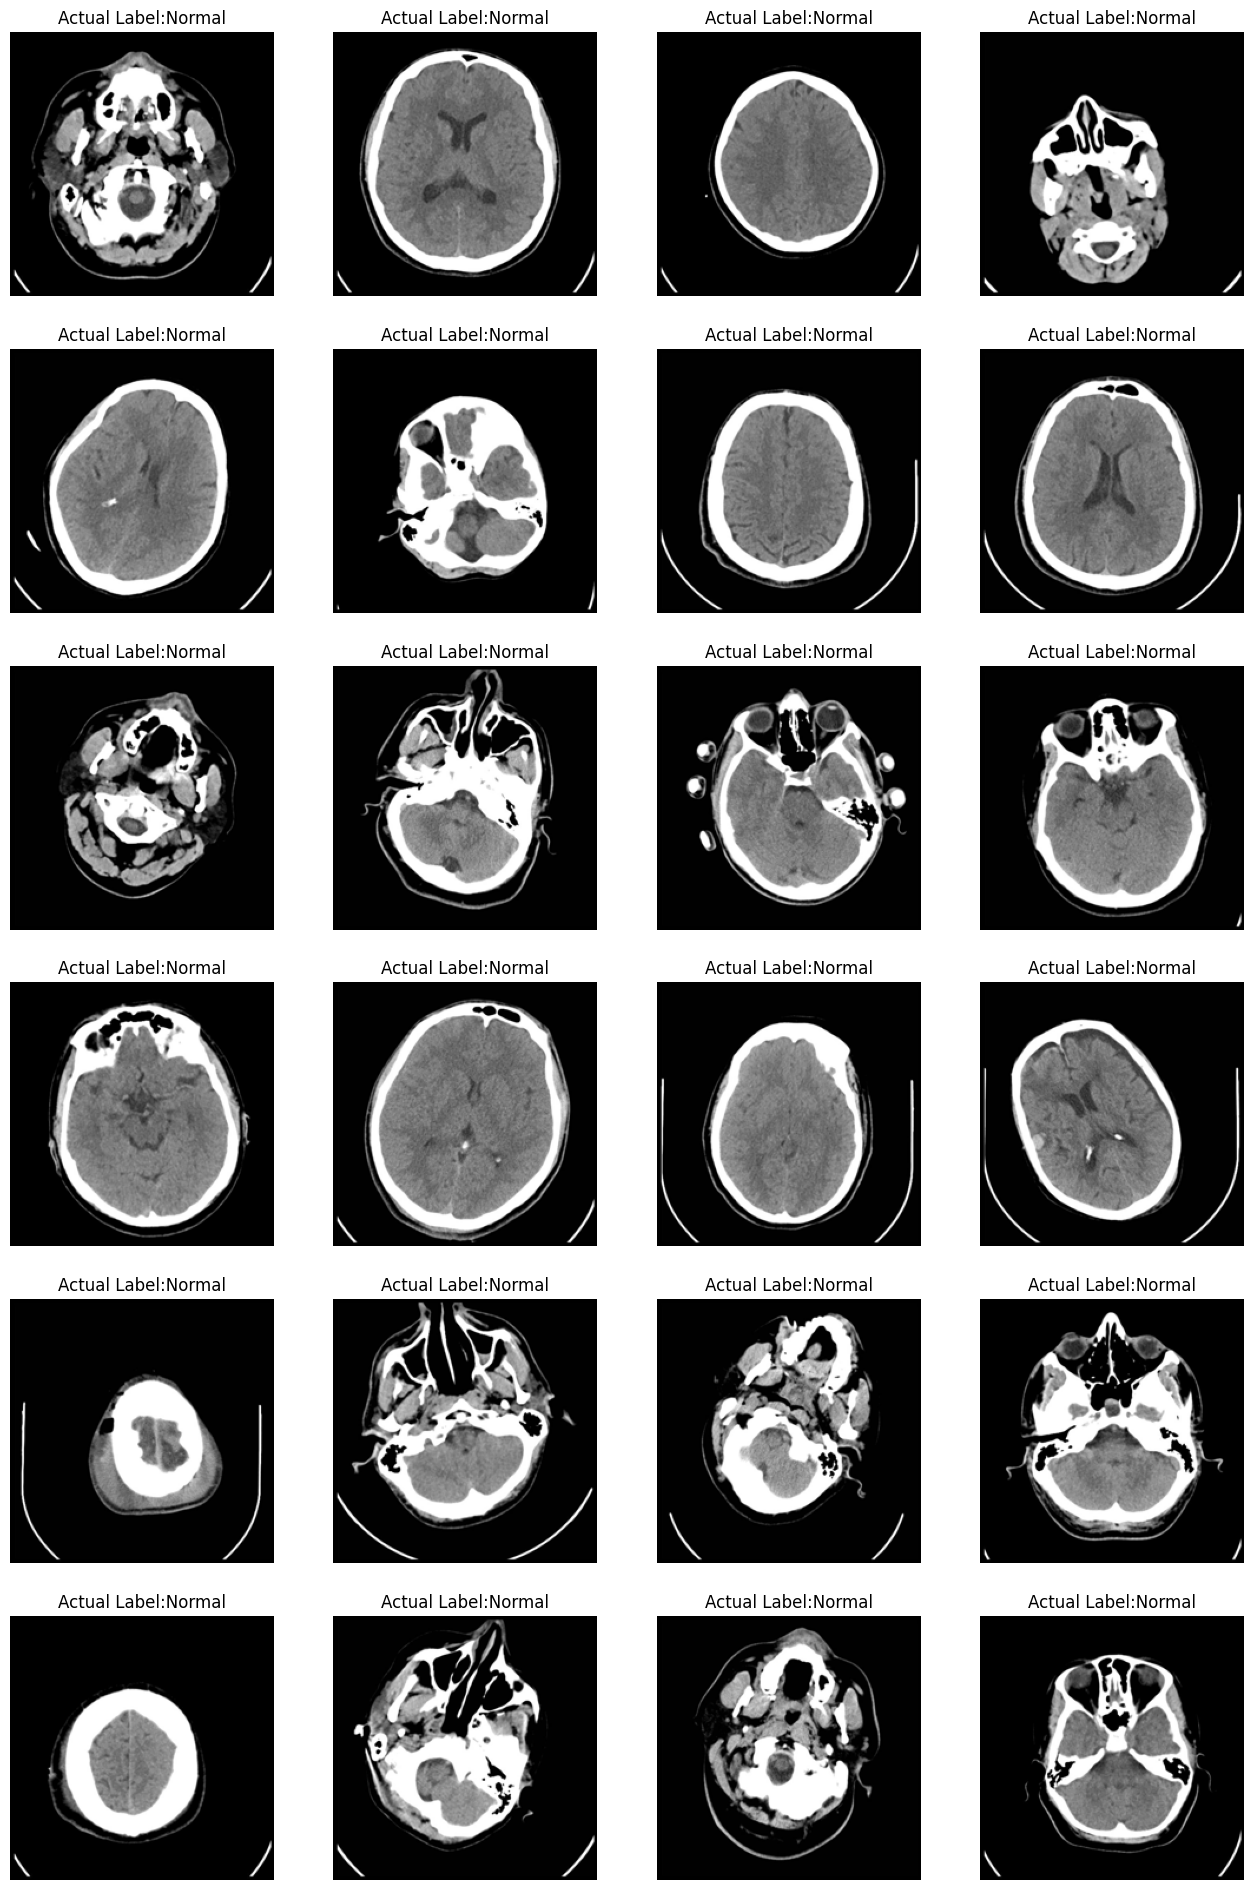

In [38]:
class_labels=["Normal","Stroke"]
plt.figure(figsize=(16,24))
for i in range (24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Actual Label:{class_labels[y_train[i]]}")
    plt.axis("off")

In [40]:
model = Sequential()

model.add(Conv2D(filters=100,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=80,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 100)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 80)      72080     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 80)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        46144     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [43]:
history=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
71/71 [==============================] - 21s 116ms/step - loss: 0.3570 - accuracy: 0.9858 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
71/71 [==============================] - 6s 91ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
71/71 [==============================] - 6s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
71/71 [==============================] - 7s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
71/71 [==============================] - 7s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [45]:
loss,acc=model.evaluate(x_test,y_test)
print("Loss on Test Data:",loss)
print("Accuracy on Test Data:",acc)

loss,acc=model.evaluate(x_train,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)

8/8 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Loss on Test Data: 0.0
Accuracy on Test Data: 1.0
71/71 [==============================] - 2s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Loss on Train Data: 0.0
Accuracy on Train Data: 1.0


In [46]:
y_pred_test=model.predict(x_test)
y_pred_test_label=[1 if i>=0.5 else 0 for i in y_pred_test]

8/8 [==============================] - 0s 35ms/step


In [47]:
print("Actual Label:",y_test[:10])
print("Predicted Label:",y_pred_test_label[:10])

Actual Label: [0 0 0 0 0 0 0 0 0 0]
Predicted Label: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [48]:
print("Metrics Evaluation on Test Data")
print()
print("Confusion Matrix:",confusion_matrix(y_test,y_pred_test_label))
print("Classification Report :",classification_report(y_test,y_pred_test_label))

Metrics Evaluation on Test Data

Confusion Matrix: [[251]]
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       251

    accuracy                           1.00       251
   macro avg       1.00      1.00      1.00       251
weighted avg       1.00      1.00      1.00       251



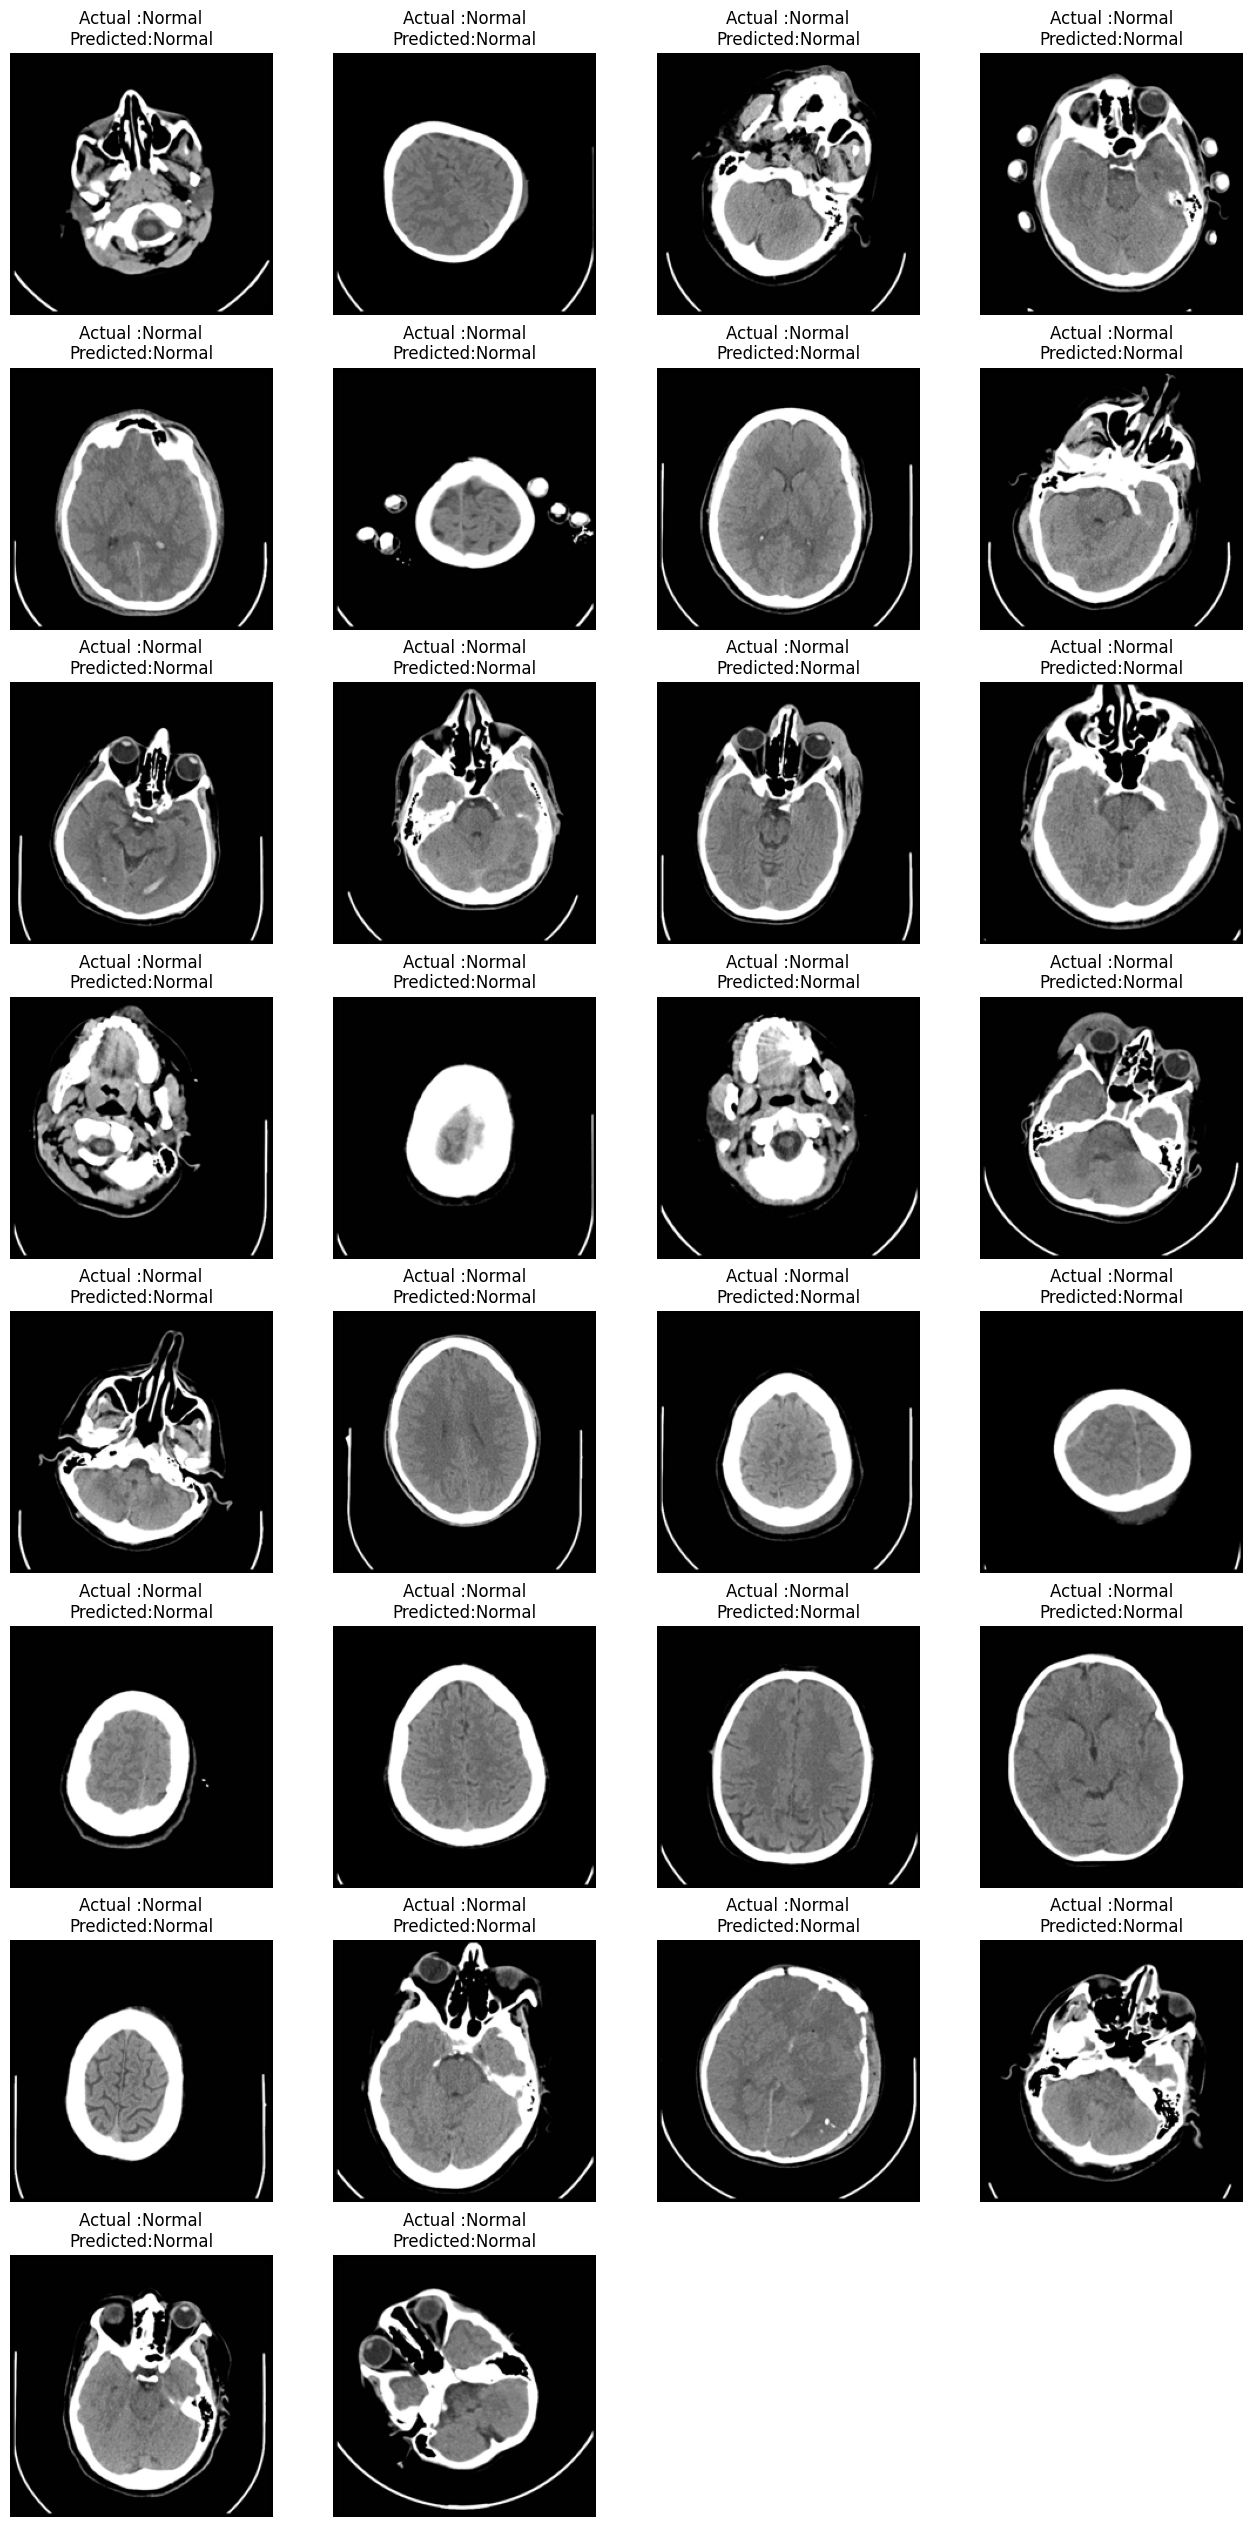

In [49]:
class_labels=["Normal","Stroke"]
plt.figure(figsize=(16,32))
for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual :{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")